In [1]:
%matplotlib inline 

import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist 

In [126]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [127]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [128]:
x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255

In [129]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [130]:
import tensorflow.keras as keras
from keras.models import Model 
from keras.layers import Dense
from keras.optimizers import Adam
from keras import Input

In [132]:
mnist_input = Input(shape = (28*28, ), dtype="float32", name="input")
hidden_1 = Dense(units=16, activation='relu', name="h1")(mnist_input)
hidden_2 = Dense(units=32, activation='relu', name="h2")(hidden_1)
hidden_3 = Dense(units=64, activation='relu', name="h3")(hidden_2)
output = Dense(units=10, activation='softmax', name="output")(hidden_3)
model = Model(inputs=[mnist_input], outputs=output)

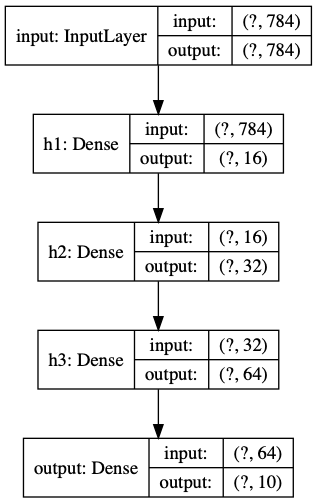

In [133]:
from tensorflow.keras.utils import plot_model 
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, 
    rankdir='top')

In [134]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 16)                12560     
_________________________________________________________________
h2 (Dense)                   (None, 32)                544       
_________________________________________________________________
h3 (Dense)                   (None, 64)                2112      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 15,866
Trainable params: 15,866
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

In [136]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.3751 - accuracy: 0.8851
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1967 - accuracy: 0.9405
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1638 - accuracy: 0.9504
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1433 - accuracy: 0.9550
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1274 - accuracy: 0.9604
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1178 - accuracy: 0.9632
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1098 - accuracy: 0.9647
Epoch 8/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1021 - accuracy: 0.9673
Epoch 9/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0966 - accuracy: 0.9695
Epoch 10/20
60000/60000 [==============================

In [137]:
loss, score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 31us/step


In [138]:
print(f"loss:{loss: .2f}\naccuracy:{score*100: .2f}%")

loss: 0.15
accuracy: 96.09%


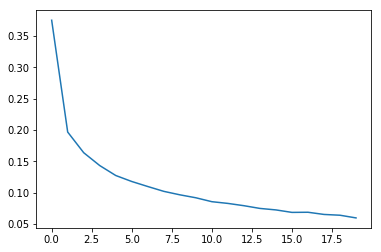

In [139]:
plt.plot(history.history["loss"]) 

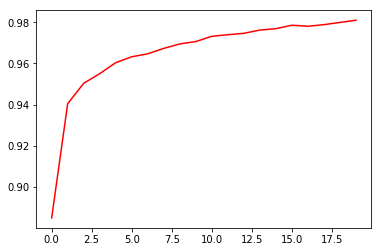

In [140]:
plt.plot(history.history["accuracy"], c="red") 

In [141]:
history.history.keys()

dict_keys(['loss', 'accuracy'])